# Open-Ended Grounding in OCID dataset

In [1]:
cd ..

c:\Users\86131\Downloads\OWG-main\OWG-main


c:\Users\86131\owg-env\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import sys
print(sys.executable)


c:\Users\86131\owg-env\Scripts\python.exe


In [3]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import FancyBboxPatch
import json 
import clip
import torch
from tqdm import tqdm

# helper function
def display_image(path_or_array, size=(10, 10)):
  if isinstance(path_or_array, str):
    image = np.asarray(Image.open(open(image_path, 'rb')).convert("RGB"))
  else:
    image = path_or_array
  
  plt.figure(figsize=size)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [ ]:
from getpass import getpass

openai_api_key = getpass()

In [4]:
# either set your openai key environment variable
#openai_api_key = os.environ['OPENAI_API_KEY']

# or read from getpass
import os
os.environ["OPENROUTER_API_KEY"] = "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"

In [5]:
from owg.visual_prompt import VisualPrompterGrounding

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Example inference with OWG

Load example image from OCID

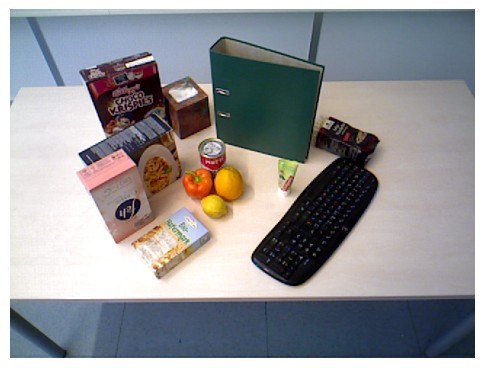

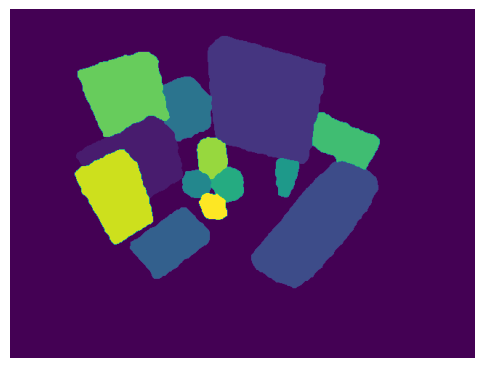

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


In [6]:
img_path = './media/example_rgb_2018-08-21-11-40-54.png'
mask_path = './media/example_mask_2018-08-21-11-40-54.png'

image_pil = Image.open(img_path)
image_np = np.array(image_pil)
ins_mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
obj_ids = np.unique(ins_mask)[1:]

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_image(image_pil, (6,6))
display_image(ins_mask, (6,6))
print(obj_ids)

In [7]:
grounder = VisualPrompterGrounding('config/ocid/OWG.yaml', debug=True)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


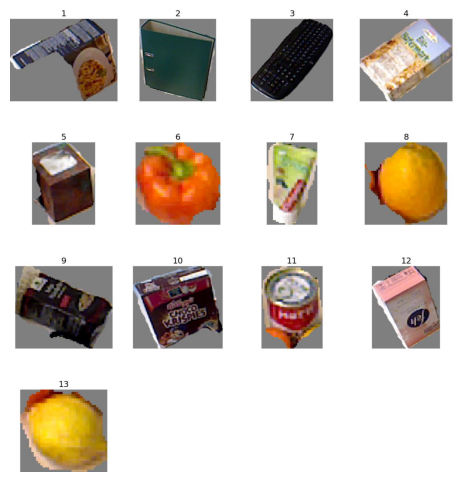

In [13]:
# display mark-based prompt
all_masks = np.stack([ins_mask == objID for objID in obj_ids])
visual_prompt, out_data = grounder.prepare_image_prompt(
    image_pil, {'masks':all_masks})
marked_image_grounding = visual_prompt[1]
image_grounding = out_data['raw_image']
markers = out_data['markers']

display_image(marked_image_grounding, (6,6))

In [14]:
# example referring queries
queries = [
    "binder",
    "lemon",
    "bell pepper",
    "Choco krispies",
    "cube",
    "pink tissues package",
    "black food package",
    "tomato soup can",
    "leftmost fruit",
    "pasta box standing on its side, left from bell pepper",
    "I want to wash my teeth",
    "I want to send an email"
]

In [15]:
for user_input in queries:
    print(user_input)
    _, output_mask, _ = grounder.request(
        text_query=user_input, image=image_pil, data={'masks':all_masks}
    )
    canvas = (0.5 * np.array(image_grounding).copy()).astype(np.uint8)
    canvas[output_mask==True,:] = np.array([255,0,0])
    display_image(np.hstack([marked_image_grounding, canvas]), (12,6))
    print('---' * 42)

binder
GPT response:
To ground the natural language description "binder" to the matching object in the image, let's follow these steps:

1. **Identify the object in the raw image**: 
   - In the raw image, there is a green object with a visible spine and what appears to be a metal ring binding, which is characteristic of a binder.

2. **Locate the object in the marked image**:
   - In the marked image, we need to find the object that matches the description and appearance of the binder in the raw image.
   - The green object with the metal ring binding is labeled with the number 2.

3. **Verify the match**:
   - The object labeled with the number 2 in the marked image corresponds to the green binder in the raw image.

My final answer is: [2]



ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1407 and the array at index 1 has size 370

binder
GPT response:
To ground the natural language description "binder" to the corresponding object in the image, let's follow these steps:

1. **Identify the object in the raw image**: 
   - In the raw image, there is a green object with a visible spine and what appears to be a metal ring binding, which is characteristic of a binder.

2. **Locate the object in the marked image**:
   - In the marked image, we need to find the object that matches the description and appearance of the binder in the raw image.
   - The green object with the metal ring binding is labeled with the number 2.

3. **Verify the match**:
   - The object labeled with the number 2 in the marked image matches the appearance and characteristics of the binder in the raw image.

My final answer is: [2]



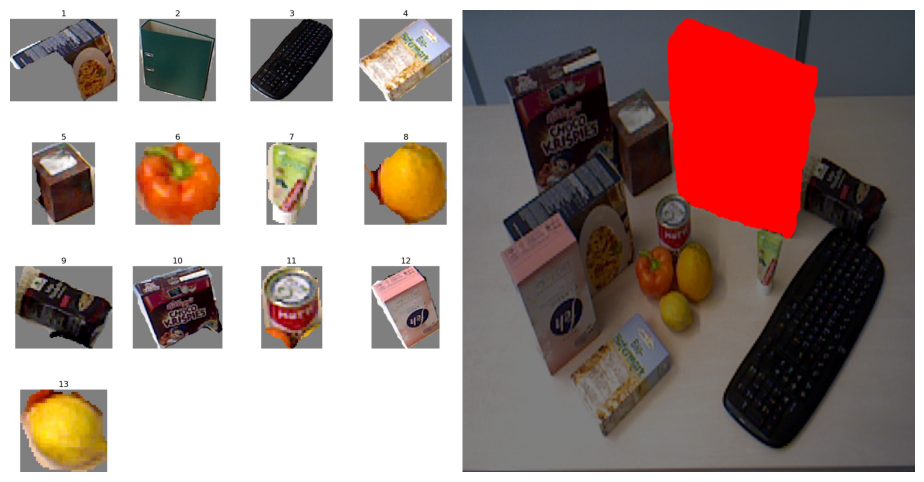

------------------------------------------------------------------------------------------------------------------------------
lemon
GPT response:
To ground the description "lemon" in the given images, let's follow these steps:

1. **Identify the target object in the raw image (Image 1):**
   - In the raw image, there are several fruits on the table. Among them, there is a yellow fruit that resembles a lemon.

2. **Locate the lemon in the raw image:**
   - The lemon is positioned near the center of the image, to the right of the orange and to the left of the green apple.

3. **Match the lemon with the marked image (Image 2):**
   - In the marked image, we need to find the object that corresponds to the lemon in the raw image.
   - The lemon in the raw image is yellow and has a smooth, round shape.
   - In the marked image, the object labeled with ID 8 matches the description of the lemon: it is yellow and has the characteristic shape of a lemon.

4. **Verify the match:**
   - The objec

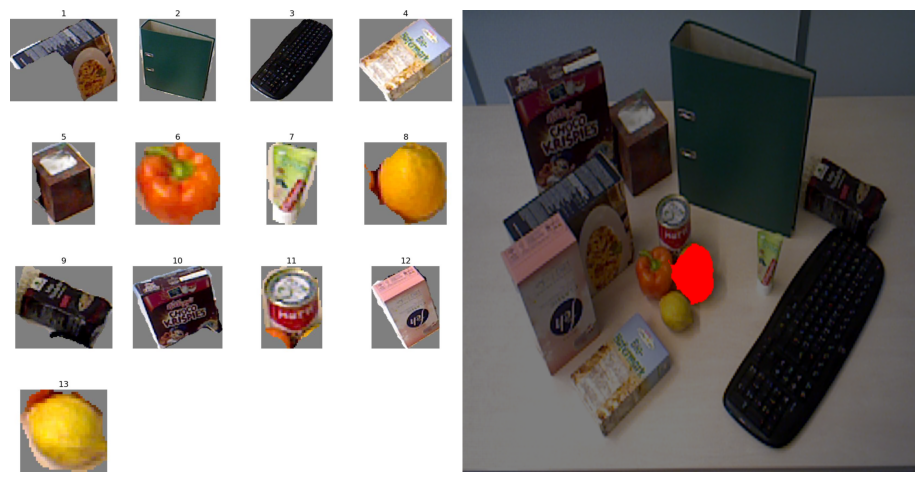

------------------------------------------------------------------------------------------------------------------------------
bell pepper
GPT response:
To ground the description "bell pepper" in the given images, let's follow these steps:

1. **Identify the object in the raw image**: 
   - In the raw image, there is an orange bell pepper located near the center of the table, to the right of the cereal boxes and to the left of the keyboard.

2. **Locate the corresponding object in the marked image**:
   - In the marked image, we need to find the object that matches the orange bell pepper from the raw image.
   - The object labeled with ID 7 in the marked image corresponds to the orange bell pepper.

3. **Verify the match**:
   - The object with ID 7 in the marked image is indeed an orange bell pepper, which matches the description in the raw image.

My final answer is: [7]



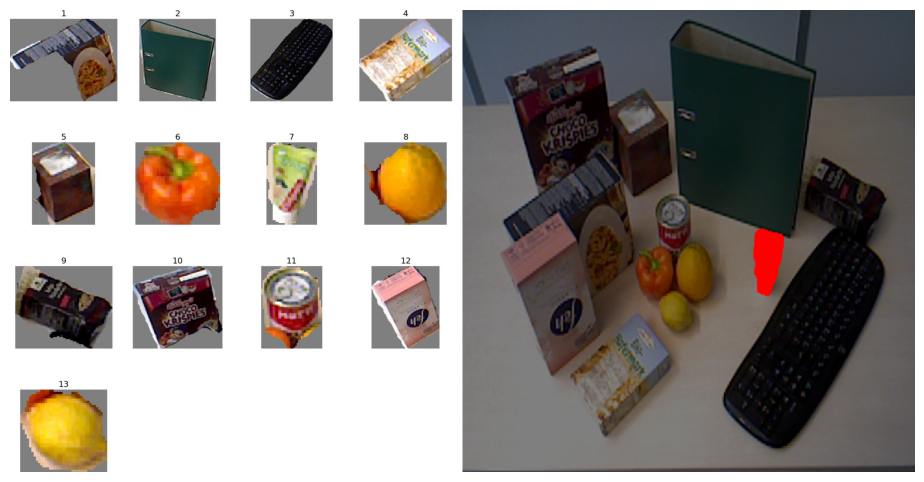

------------------------------------------------------------------------------------------------------------------------------
Choco krispies
GPT response:
To ground the description "Choco Krispies" to the corresponding object in the image, let's follow these steps:

1. **Identify the object in the raw image:**
   - In the raw image, there is a box of cereal with the text "Choco Krispies" visible on it. This box is located towards the back left of the image.

2. **Locate the object in the marked image:**
   - In the marked image, we need to find the object that matches the description and appearance of the "Choco Krispies" box from the raw image.
   - The object with the text "Choco Krispies" is labeled with ID 10.

3. **Verify the match:**
   - The object labeled with ID 10 in the marked image has the same appearance and text as the "Choco Krispies" box in the raw image.
   - This confirms that the object labeled with ID 10 is indeed the "Choco Krispies" box.

My final answer is: [10]

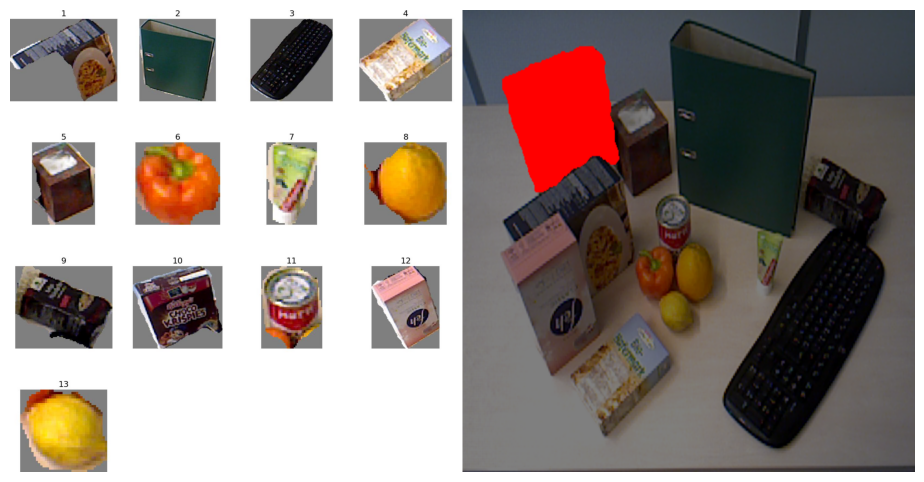

------------------------------------------------------------------------------------------------------------------------------
cube
GPT response:
To ground the description "cube" in the given images, let's follow these steps:

1. **Identify the cube in the raw image (Image 1):**
   - A cube is a three-dimensional shape with six square faces.
   - In the raw image, there is a small, brown, cube-shaped object near the center-left of the image. It appears to be a small box or container.

2. **Locate the cube in the marked image (Image 2):**
   - The marked image shows various objects with unique IDs.
   - The small, brown, cube-shaped object from the raw image corresponds to the object labeled with ID 5 in the marked image.

3. **Verify the match:**
   - The object labeled with ID 5 in the marked image matches the description of a cube in the raw image.

My final answer is: [5]



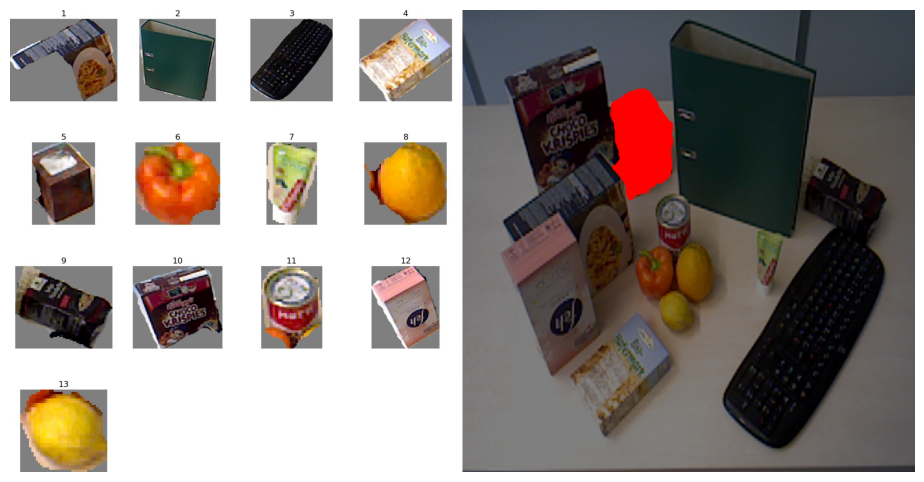

------------------------------------------------------------------------------------------------------------------------------
pink tissues package
GPT response:
To ground the description "pink tissues package," let's follow these steps:

1. **Identify the color**: The description specifies "pink." We need to look for an object with a pink color in the raw image.
2. **Identify the object type**: The description mentions "tissues package," so we are looking for a package that is likely to contain tissues.
3. **Locate the object in the raw image**: Scanning the raw image, we can see a pink box on the left side of the image. This box has a design and text that is consistent with a tissues package.
4. **Match the object with the marked image**: In the marked image, we need to find the object that corresponds to the pink tissues package. The pink box in the raw image matches the object labeled as ID 12 in the marked image.

My final answer is: [12]



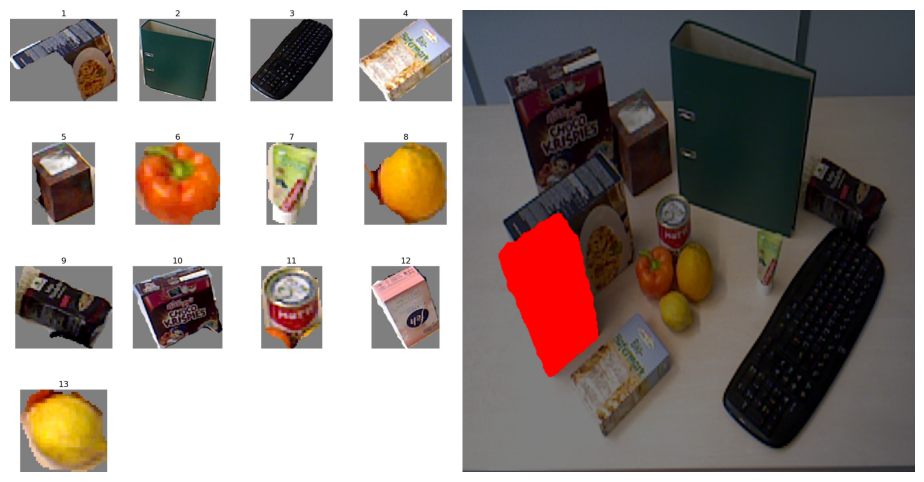

------------------------------------------------------------------------------------------------------------------------------
black food package
GPT response:
To ground the description "black food package," let's follow these steps:

1. **Identify the color**: The description specifies "black," so we need to look for objects that are black in color.
2. **Identify the type**: The description specifies "food package," so we need to look for objects that are packages and are related to food.

### Step-by-Step Reasoning:
- In the raw image, there is a black package located near the top right corner of the table.
- This black package appears to be a food item, as it is among other food packages and items.
- In the marked image, this black food package is labeled with ID **9**.

### Final Answer:
My final answer is: [9]



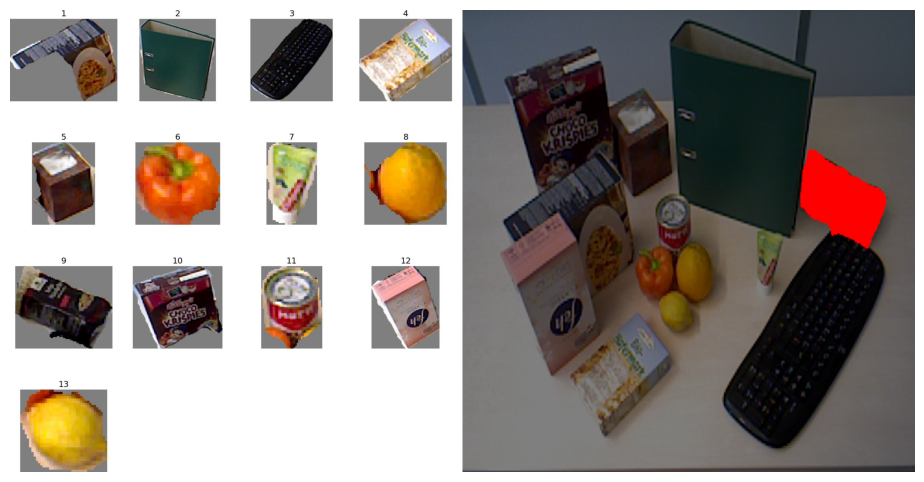

------------------------------------------------------------------------------------------------------------------------------
tomato soup can
GPT response:
To ground the description "tomato soup can" to the corresponding object in the images, let's follow these steps:

1. **Identify the object in the raw image:**
   - In the raw image, there is a can with a red label that appears to be a tomato soup can. It is located near the center of the image, to the right of the cereal box and to the left of the green folder.

2. **Locate the object in the marked image:**
   - In the marked image, we need to find the can that matches the description. The can with a red label is highlighted with a unique color and has the ID number 11.

3. **Verify the object:**
   - The object with ID 11 in the marked image is indeed a can with a red label, which matches the description of a "tomato soup can."

My final answer is: [11]



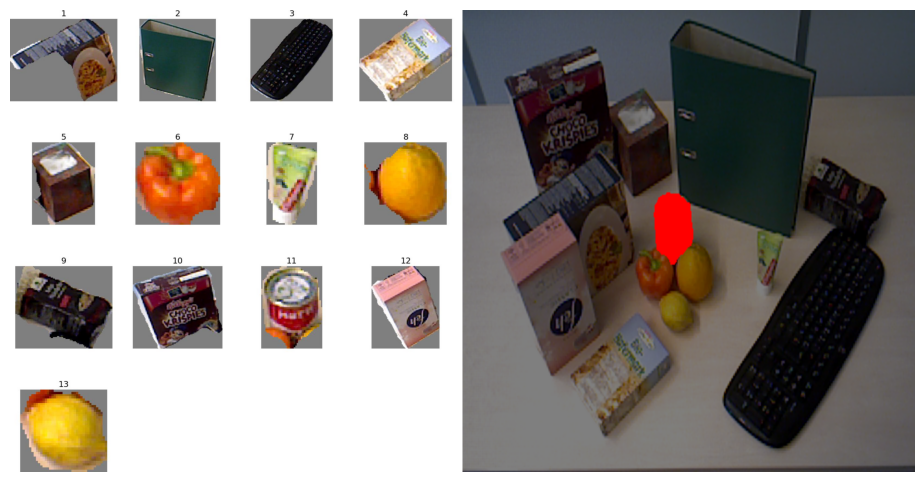

------------------------------------------------------------------------------------------------------------------------------
leftmost fruit
GPT response:
To ground the "leftmost fruit" in the raw image and find its corresponding ID in the marked image, let's follow these steps:

### Step 1: Identify the fruits in the raw image
In the raw image, the fruits are:
- An orange (leftmost)
- A lemon (next to the orange)
- A yellow fruit (possibly a lemon or a similar fruit, farthest right)

### Step 2: Determine the leftmost fruit
The leftmost fruit in the raw image is the orange.

### Step 3: Locate the leftmost fruit in the marked image
In the marked image, the orange is highlighted with a unique color and has the ID **6**.

### Step 4: Verify the spatial relationship
The orange is indeed the leftmost fruit in the raw image, and it corresponds to the object with ID **6** in the marked image.

### Final Answer:
My final answer is: [6]



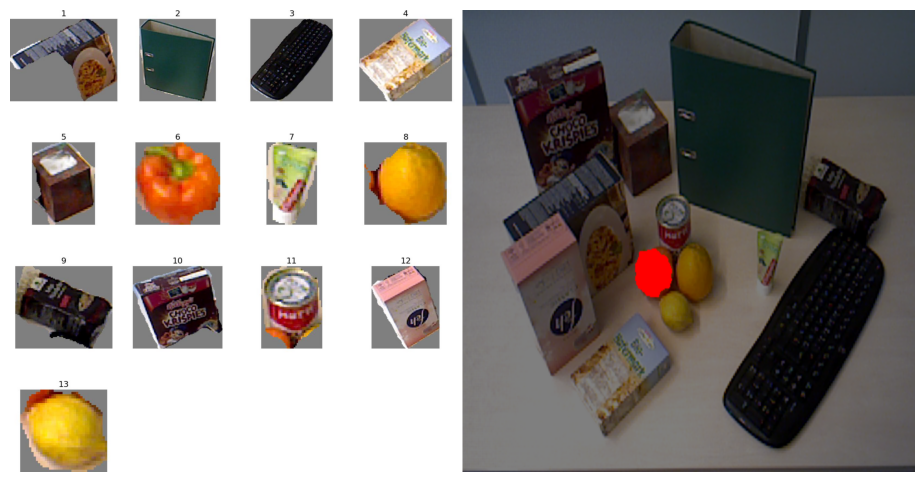

------------------------------------------------------------------------------------------------------------------------------
pasta box standing on its side, left from bell pepper
GPT response:
To ground the description "pasta box standing on its side, left from bell pepper," let's follow these steps:

1. **Identify the bell pepper**: In the raw image, the bell pepper is the orange, round object near the center. From the marked image, we can see that the bell pepper corresponds to ID 7.

2. **Locate the pasta box**: The description specifies that the pasta box is "standing on its side" and is "left from" the bell pepper. In the raw image, we can see a box that appears to be a pasta box (with a design that suggests it contains pasta) positioned to the left of the bell pepper. This box is standing on its side, as described.

3. **Match the pasta box in the marked image**: The pasta box in the raw image corresponds to ID 1 in the marked image. It is the box with a design that suggests it

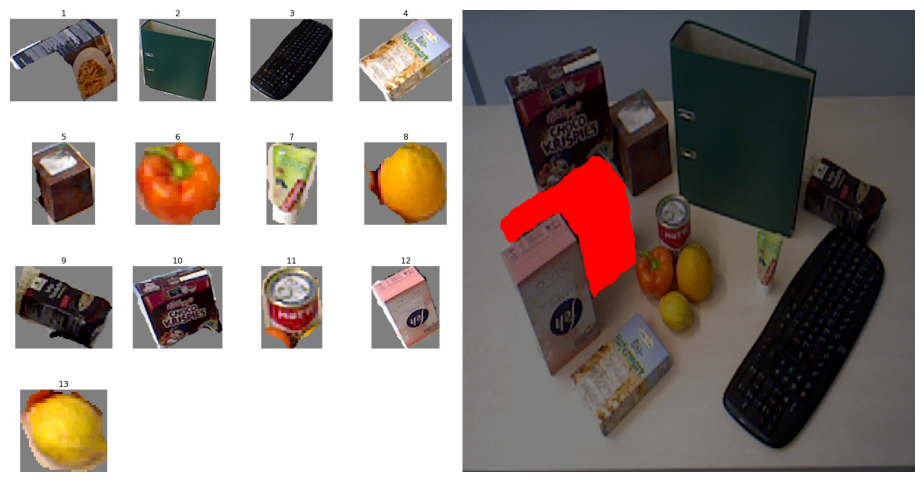

------------------------------------------------------------------------------------------------------------------------------
I want to wash my teeth
GPT response:
To ground the natural language description "I want to wash my teeth" to the objects in the given images, let's follow these steps:

1. **Understand the Description**: The description mentions "washing teeth," which typically involves a toothbrush and toothpaste. However, the provided images do not contain any objects directly related to toothbrushes or toothpaste.

2. **Analyze the Raw Image**: The raw image shows various objects on a table, including:
   - Cereal boxes
   - A binder
   - A keyboard
   - Fruits (oranges, lemon)
   - A can
   - A small box
   - A carton (possibly milk)
   - A book or notebook

3. **Check for Relevant Objects**: None of the objects in the raw image are related to toothbrushes or toothpaste. The objects present are food items, office supplies, and fruits, which are not relevant to the task of 

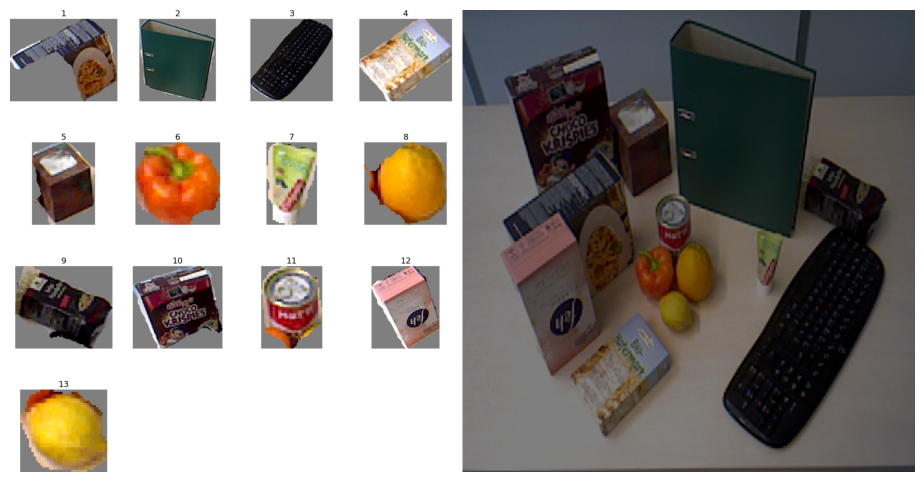

------------------------------------------------------------------------------------------------------------------------------
I want to send an email
GPT response:
To ground the natural language description "I want to send an email" to the objects in the given images, let's follow these steps:

1. **Identify the relevant object**: The action of sending an email typically involves using a computer or a device with internet access. In the context of the provided images, the most relevant object would be a keyboard, as it is used to type and interact with a computer.

2. **Locate the keyboard in the raw image**:
   - In the raw image (Image 1), there is a black keyboard on the right side of the table.

3. **Match the keyboard with the marked image**:
   - In the marked image (Image 2), the black keyboard is highlighted with the ID **3**.

4. **Verify the match**:
   - The keyboard in the raw image matches the keyboard highlighted with ID **3** in the marked image.

My final answer is: [3

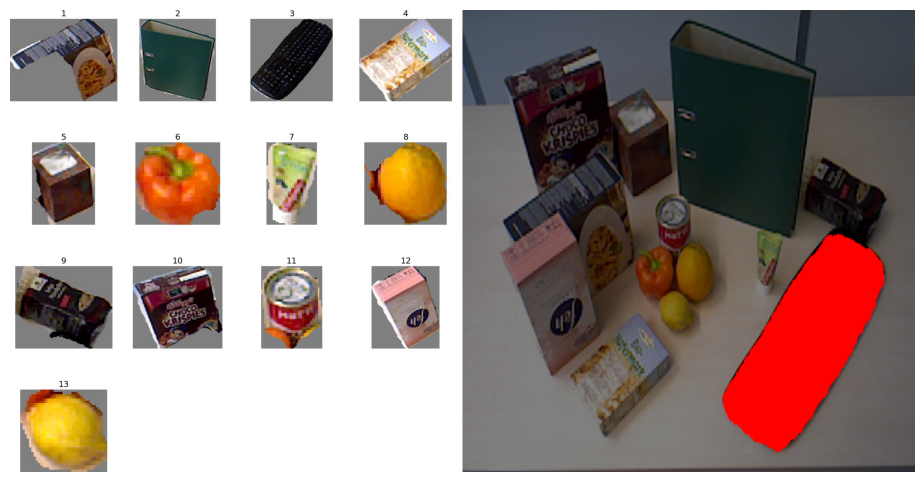

------------------------------------------------------------------------------------------------------------------------------


In [18]:
for user_input in queries:
    print(user_input)
    _, output_mask, _ = grounder.request(
        text_query=user_input, image=image_pil, data={'masks':all_masks}
    )

    canvas = (0.5 * np.array(image_grounding).copy()).astype(np.uint8)
    canvas[output_mask==True,:] = np.array([255,0,0])

    
    # Resize canvas to match height
    marked_image_np = np.array(marked_image_grounding)

    canvas_resized = cv2.resize(
        canvas,
        (marked_image_np.shape[1], marked_image_np.shape[0])
    )

    display_image(np.hstack([marked_image_np, canvas_resized]), (12,6))

    print('---' * 42)


Load dataset and metrics

In [19]:
test_dataset = torch.load("/home/p300488/LMM_utils/LMM-grasp-anything/_dumps/ocid_test_grounding_v4_all.p")

FileNotFoundError: [Errno 2] No such file or directory: '/home/p300488/LMM_utils/LMM-grasp-anything/_dumps/ocid_test_grounding_v4_all.p'

In [12]:
# referring segmentation
def segmentation_metrics(preds, masks, device):
    iou_list = []
    for pred, mask in zip(preds, masks):
        # pred: (H, W): bool, mask: (H, W): bool
        # iou
        inter = np.logical_and(pred, mask)
        union = np.logical_or(pred, mask)
        iou = np.sum(inter) / (np.sum(union) + 1e-6)
        iou_list.append(iou)
    iou_list = np.stack(iou_list)
    iou_list = torch.from_numpy(iou_list).to(device)
    prec_list = []
    for thres in torch.arange(0.5, 1.0, 0.1):
        tmp = (iou_list > thres).float().mean()
        prec_list.append(tmp)
    iou = iou_list.mean()
    iou_std = iou_list.var()
    prec = {}
    temp = '  '
    for i, thres in enumerate(range(5, 10)):
        key = 'Pr@{}'.format(thres * 10)
        value = prec_list[i].item()
        prec[key] = value
        temp += "{}: {:.2f}  ".format(key, 100. * value)
    head = 'Evaluation: IoU (mean)={:.2f}, (std)={:.2f}'.format(100. * iou.item(), 100. * iou_std.item())
    return head + temp, {'iou': iou.item(), 'iou_std': iou_std.item(), **prec}

## Evaluation CLIP

CLIP utils

In [13]:
def article(name):
  return 'an' if name[0] in 'aeiou' else 'a'

def processed_name(name, rm_dot=False):
  # _ for lvis
  # / for obj365
  res = name.replace('_', ' ').replace('/', ' or ').lower()
  if rm_dot:
    res = res.rstrip('.')
  return res

single_template_imagenet = [
    'a photo of {article} {}.'
]

multiple_templates_imagenet = [
    'There is {article} {} in the scene.',
    'There is the {} in the scene.',
    'a photo of {article} {} in the scene.',
    'a photo of the {} in the scene.',
    'a photo of one {} in the scene.',


    'itap of {article} {}.',
    'itap of my {}.',  # itap: I took a picture of
    'itap of the {}.',
    'a photo of {article} {}.',
    'a photo of my {}.',
    'a photo of the {}.',
    'a photo of one {}.',
    'a photo of many {}.',

    'a good photo of {article} {}.',
    'a good photo of the {}.',
    'a bad photo of {article} {}.',
    'a bad photo of the {}.',
    'a photo of a nice {}.',
    'a photo of the nice {}.',
    'a photo of a cool {}.',
    'a photo of the cool {}.',
    'a photo of a weird {}.',
    'a photo of the weird {}.',

    'a photo of a small {}.',
    'a photo of the small {}.',
    'a photo of a large {}.',
    'a photo of the large {}.',

    'a photo of a clean {}.',
    'a photo of the clean {}.',
    'a photo of a dirty {}.',
    'a photo of the dirty {}.',

    'a bright photo of {article} {}.',
    'a bright photo of the {}.',
    'a dark photo of {article} {}.',
    'a dark photo of the {}.',

    'a photo of a hard to see {}.',
    'a photo of the hard to see {}.',
    'a low resolution photo of {article} {}.',
    'a low resolution photo of the {}.',
    'a cropped photo of {article} {}.',
    'a cropped photo of the {}.',
    'a close-up photo of {article} {}.',
    'a close-up photo of the {}.',
    'a jpeg corrupted photo of {article} {}.',
    'a jpeg corrupted photo of the {}.',
    'a blurry photo of {article} {}.',
    'a blurry photo of the {}.',
    'a pixelated photo of {article} {}.',
    'a pixelated photo of the {}.',

    'a black and white photo of the {}.',
    'a black and white photo of {article} {}.',

    'a plastic {}.',
    'the plastic {}.',

    'a toy {}.',
    'the toy {}.',
    'a plushie {}.',
    'the plushie {}.',
    'a cartoon {}.',
    'the cartoon {}.',

    'an embroidered {}.',
    'the embroidered {}.',

    'a painting of the {}.',
    'a painting of a {}.',
]

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)

In [15]:
def build_text_embedding(categories, prompt_engineering=True, this_is=True, single_template=single_template_imagenet, multiple_templates=multiple_templates_imagenet):
  if prompt_engineering:
    templates = multiple_templates
  else:
    templates = single_template

  with torch.no_grad():
    all_text_embeddings = []
    #print('Building text embeddings...')
    for category in categories:
      texts = [
        template.format(processed_name(category['name'], rm_dot=True),
                        article=article(category['name']))
        for template in templates]
      if this_is:
        texts = [
                 'This is ' + text if text.startswith('a') or text.startswith('the') else text 
                 for text in texts
                 ]
      texts = clip.tokenize(texts).to(device) #tokenize
      text_embeddings = model.encode_text(texts) #embed with text encoder
      text_embeddings /= text_embeddings.norm(dim=-1, keepdim=True)
      text_embedding = text_embeddings.mean(dim=0) #average accross prompt templates
      text_embedding /= text_embedding.norm()
      all_text_embeddings.append(text_embedding)
    all_text_embeddings = torch.stack(all_text_embeddings, dim=1)
    
  return all_text_embeddings.to(device).T

In [16]:
def extract_features_pt(images):
    image_inputs = torch.stack([preprocess(Image.fromarray(i)).to(device) for i in images])
    image_features = model.encode_image(image_inputs)
    image_features_norm = image_features / image_features.norm(dim=1, keepdim=True)
    return image_features_norm

In [17]:
def clip_get_most_similar_queries(object_image_features, text_embedding, masks, image, show=False):
    similarities = object_image_features @ text_embedding.T
    most_similar_indices =  similarities.mean(1).argmax(0)
    # most_similar_indices =  similarities.squeeze().argmax(0).cpu().numpy()
    
    if show:
        for prompt, index in zip(category_names, most_similar_indices):
            print(prompt)
            plt.figure(figsize=(10,10))
            plt.imshow(image)
            show_anns([masks[index]])
            plt.axis('off')
            plt.show() 
    
    #return [mask for i, mask in enumerate(masks) if i in most_similar_indices]
    return  masks[most_similar_indices.item()], most_similar_indices.item()

In [18]:
def clip_get_most_similar_imgs(object_image_features, category_name_string, masks, image, show=True):
    # Preprocessing categories and get params
    category_names = [x.strip() for x in category_name_string.split(';')]
    categories = [{'name': item, 'id': idx+1,} for idx, item in enumerate(category_names)]
    
    text_embedding = build_text_embedding(categories)
    
    similarities = object_image_features @ text_embedding.T
    most_similar_indices =  similarities.mean(0).argmax(0)
    # most_similar_indices =  similarities.squeeze().argmax(0).cpu().numpy()
    
    if show:
        for prompt, index in zip(category_names, most_similar_indices):
            print(prompt)
            plt.figure(figsize=(10,10))
            plt.imshow(image)
            show_anns([masks[index]])
            plt.axis('off')
            plt.show() 
    
    #return [mask for i, mask in enumerate(masks) if i in most_similar_indices]
    return most_similar_indices

In [19]:
# get contour out of binary mask
def get_mask_contour(binary_mask):
    # Find all contours in the binary mask
    contours, _ = cv2.findContours(binary_mask.astype(np.uint8) * 255, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Combine all contours into one array
    #all_contours = np.vstack(contours[i] for i in range(len(contours)))
    all_contours = np.vstack(contours)
    
    return all_contours


# get bbox out of binary mask
def get_mask_bbox(binary_mask):
    cont = get_mask_contour(binary_mask)
    x, y, w, h = cv2.boundingRect(cont)
    return [x,y,w,h]


# fit ellipse in contour out of binary mask
def get_mask_ellipse(binary_mask):
    cont = get_mask_contour(binary_mask)
    try:
        ellipse = cv2.fitEllipse(cont)
    except:
        x,y,w,h = cv2.boundingRect(cont)
        ellipse = ((x,y), (w,h), 0)
    return ellipse

In [20]:
# construct seg masks from dataset
seg_masks = {}
for refer_type, data in test_dataset.items():
    seg_masks[refer_type] = {}
    for samp in data:
        seg_masks[refer_type][samp['scene_id']] = samp['masks_gt']

In [21]:
# eval function
@torch.no_grad()
def eval_dataset(predict_fn):
    metrics = {}
    for refer_type, data in test_dataset.items():
        print(refer_type)
        all_preds, all_gt = [], []
        for samp in tqdm(data):

            img = samp['img']
            masks = seg_masks[refer_type][samp['scene_id']]
            boxes = [get_mask_bbox(m) for m in masks]

            pred = predict_fn(img, samp['sentence'], masks, boxes)
            
            all_preds.append(pred)
            all_gt.append(samp['mask'])

        met = segmentation_metrics(all_preds, all_gt, device)
        print(met[0])
        print()
        metrics[refer_type] = met[1]
        torch.cuda.empty_cache()
    return metrics

### ReCLIP (No relation resolution)

In [22]:
def extract_features_reclip(image, masks, boxes):
    object_image_features = []
    for m, bb in zip(masks, boxes):
        # ReCLIP style - both mask and crop
        #segm = m['segmentation']
        segm = m.copy()
        mask = np.ones_like(image) * 0xff
        mask[segm==True] = image[segm==True]
        # print(mask.shape)
        mask_input = preprocess(Image.fromarray(mask)).to(device)

        #bbox = m['bbox']
        #x, y, w, h = int(np.floor(bbox[0])), int(np.floor(bbox[1])), int(np.ceil(bbox[2])), int(np.ceil(bbox[3]))
        x, y, w, h = bb
        crop_box = image[y:y+h, x:x+w, :]
        box_input = preprocess(Image.fromarray(crop_box)).to(device)

        image_inputs = torch.stack([mask_input, box_input])
        image_features = model.encode_image(image_inputs)
        image_features_norm = image_features / image_features.norm(dim=1, keepdim=True)
        object_image_features.append(image_features_norm)

    object_image_features = torch.stack(object_image_features)
    
    return object_image_features

In [23]:
def predict_reclip(image, query, masks, boxes):
    # Preprocessing categories and get params
    category_names = [x.strip() for x in query.split(';')]
    categories = [{'name': item, 'id': idx+1,} for idx, item in enumerate(category_names)]
    
    text_embedding = build_text_embedding(categories, prompt_engineering=False, this_is=True,
                                         )
    #prompt = query + ';'
    object_feats = extract_features_reclip(image, masks, boxes)
    mask_out, _ = clip_get_most_similar_queries(object_feats, text_embedding, masks, image)
    return mask_out

In [24]:
results_reclip = eval_dataset(predict_reclip)

semantic_relations


100%|███████████████████████████████████████████| 13/13 [00:01<00:00,  6.56it/s]


Evaluation: IoU (mean)=46.15, (std)=26.92  Pr@50: 46.15  Pr@60: 46.15  Pr@70: 46.15  Pr@80: 46.15  Pr@90: 46.15  

visual_relations


100%|███████████████████████████████████████████| 19/19 [00:02<00:00,  6.52it/s]


Evaluation: IoU (mean)=47.37, (std)=26.32  Pr@50: 47.37  Pr@60: 47.37  Pr@70: 47.37  Pr@80: 47.37  Pr@90: 47.37  

multi_hop


100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  6.49it/s]


Evaluation: IoU (mean)=20.83, (std)=17.21  Pr@50: 20.83  Pr@60: 20.83  Pr@70: 20.83  Pr@80: 20.83  Pr@90: 20.83  

spatial_relations


100%|███████████████████████████████████████████| 33/33 [00:04<00:00,  7.22it/s]


Evaluation: IoU (mean)=27.27, (std)=20.45  Pr@50: 27.27  Pr@60: 27.27  Pr@70: 27.27  Pr@80: 27.27  Pr@90: 27.27  

affordance


100%|███████████████████████████████████████████| 16/16 [00:01<00:00,  8.92it/s]


Evaluation: IoU (mean)=62.50, (std)=25.00  Pr@50: 62.50  Pr@60: 62.50  Pr@70: 62.50  Pr@80: 62.50  Pr@90: 62.50  

name


100%|███████████████████████████████████████████| 42/42 [00:04<00:00,  8.74it/s]


Evaluation: IoU (mean)=73.81, (std)=19.80  Pr@50: 73.81  Pr@60: 73.81  Pr@70: 73.81  Pr@80: 73.81  Pr@90: 73.81  

attribute


100%|███████████████████████████████████████████| 26/26 [00:03<00:00,  7.01it/s]

Evaluation: IoU (mean)=57.69, (std)=25.38  Pr@50: 57.69  Pr@60: 57.69  Pr@70: 57.69  Pr@80: 57.69  Pr@90: 57.69  



### RedCircle

In [25]:
# visual prmopt
def red_circle_paint(image, masks, boxes, geometry="ellipse"):
    H, W = image.shape[:2]
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)
    gray3 = cv2.merge([gray, gray, gray])
    blur = cv2.GaussianBlur(image.copy(), (31,31), 0)
    
    prompts=[]
    for m, bb in zip(masks, boxes):
        x, y, w, h = bb
           
        if geometry == 'rectangle':
            draw = cv2.rectangle(image.copy(), (x,y), (x+w,y+h), (255,0,0), thickness=3)
            prompt_mask = cv2.rectangle(np.zeros((H, W), dtype=np.uint8),
                                      (x,y),
                                      (x+w, y+h),
                                      0xff,
                                      -1
            ).astype(bool)

            
        
        elif geometry == 'circle':
            center = int(x + w//2), int(y+h//2)
            rad = max(w,h) // 2
            draw = cv2.circle(image.copy(), center, rad, (255, 0, 0), thickness=3)
            prompt_mask = cv2.circle(np.zeros((H, W), dtype=np.uint8),
                                      center,
                                      rad,
                                      0xff,
                                      -1
            ).astype(bool)
            
            
            
        elif geometry == 'ellipse':
            ell = get_mask_ellipse(m)
            try:
                draw = cv2.ellipse(image.copy(), ell, (255, 0, 0), thickness=3)
                prompt_mask = cv2.ellipse(np.zeros((H, W), dtype=np.uint8),
                                      ell,
                                      0xff,
                                      -1
                ).astype(bool)
            except:
                draw = image.copy()
                prompt_mask = cv2.rectangle(np.zeros((H, W), dtype=np.uint8),
                                      (x,y),
                                      (x+w, y+h),
                                      0xff,
                                      -1
            ).astype(bool)
            

        gray_rev = gray3.copy()
        gray_rev[prompt_mask==True] = image[prompt_mask==True]
        blur_rev = blur.copy()
        blur_rev[prompt_mask==True] = image[prompt_mask==True]
            
        prompt = {'image': draw}
        prompt['gray_reverse'] = gray_rev
        prompt['blur_reverse'] = blur_rev
            
        prompts.append(prompt)
        
    return prompts

In [26]:
def extract_features_redcircle(image, masks, boxes, prompt_type, with_crop=False, with_mask=False):
    visual_prompts = red_circle_paint(image, masks, boxes, geometry=prompt_type)
    
    object_image_features = []

    for im, m, bb in zip(visual_prompts, masks, boxes):
        simple_input = preprocess(Image.fromarray(im['image'])).to(device)
        
        # + grayscale reverse
        gray_rev_input = preprocess(Image.fromarray(im['gray_reverse'])).to(device)

        # + blur reverse
        blur_rev_input = preprocess(Image.fromarray(im['blur_reverse'])).to(device)
        
        image_inputs = torch.stack([simple_input, gray_rev_input, blur_rev_input])
        #image_inputs = torch.stack([simple_input, blur_rev_input])
        
        if with_mask:
            segm = m.copy()
            mask = np.ones_like(image) * 0xff
            mask[segm==True] = image[segm==True]
            mask_input = preprocess(Image.fromarray(mask)).to(device)

            image_inputs = torch.cat([image_inputs, mask_input.unsqueeze(0)])
            
        if with_crop:
            x, y, w, h = bb
            crop_box = image[y:y+h, x:x+w, :]
            box_input = preprocess(Image.fromarray(crop_box)).to(device)
            
            image_inputs = torch.cat([image_inputs, box_input.unsqueeze(0)], dim=0)

        
        image_features = model.encode_image(image_inputs)
        image_features_norm = image_features / image_features.norm(dim=1, keepdim=True)
        object_image_features.append(image_features_norm)
        
    return torch.stack(object_image_features)

In [27]:
def predict_redcircle( prompt_engineering=False,
                        prompt_type = 'ellipse',
                        this_is=False,
                        with_crop=False,
                        with_mask=False
                     ):
    
    def _predict_redcircle(image, query, masks, boxes):
        # Preprocessing categories and get params
        category_names = [x.strip() for x in query.split(';')]
        categories = [{'name': item, 'id': idx+1,} for idx, item in enumerate(category_names)]

        text_embedding = build_text_embedding(categories, prompt_engineering=prompt_engineering, this_is=this_is,
                                             )
        #prompt = query + ';'
        object_feats = extract_features_redcircle(image, masks, boxes, prompt_type, with_crop, with_mask)
        mask_out, _ = clip_get_most_similar_queries(object_feats, text_embedding, masks, image)
        return mask_out
    
    return _predict_redcircle

In [28]:
# RedCircle: ellipse + blur + gray + multi
results_redcircle = eval_dataset(predict_redcircle(prompt_engineering=True, prompt_type='ellipse'))

semantic_relations


100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.81it/s]


Evaluation: IoU (mean)=46.15, (std)=26.92  Pr@50: 46.15  Pr@60: 46.15  Pr@70: 46.15  Pr@80: 46.15  Pr@90: 46.15  

visual_relations


100%|███████████████████████████████████████████| 19/19 [00:05<00:00,  3.77it/s]


Evaluation: IoU (mean)=36.84, (std)=24.56  Pr@50: 36.84  Pr@60: 36.84  Pr@70: 36.84  Pr@80: 36.84  Pr@90: 36.84  

multi_hop


100%|███████████████████████████████████████████| 24/24 [00:06<00:00,  3.67it/s]


Evaluation: IoU (mean)=20.83, (std)=17.21  Pr@50: 20.83  Pr@60: 20.83  Pr@70: 20.83  Pr@80: 20.83  Pr@90: 20.83  

spatial_relations


100%|███████████████████████████████████████████| 33/33 [00:08<00:00,  4.11it/s]


Evaluation: IoU (mean)=24.24, (std)=18.94  Pr@50: 24.24  Pr@60: 24.24  Pr@70: 24.24  Pr@80: 24.24  Pr@90: 24.24  

affordance


100%|███████████████████████████████████████████| 16/16 [00:03<00:00,  4.81it/s]


Evaluation: IoU (mean)=31.25, (std)=22.92  Pr@50: 31.25  Pr@60: 31.25  Pr@70: 31.25  Pr@80: 31.25  Pr@90: 31.25  

name


100%|███████████████████████████████████████████| 42/42 [00:08<00:00,  4.69it/s]


Evaluation: IoU (mean)=33.33, (std)=22.76  Pr@50: 33.33  Pr@60: 33.33  Pr@70: 33.33  Pr@80: 33.33  Pr@90: 33.33  

attribute


100%|███████████████████████████████████████████| 26/26 [00:06<00:00,  3.93it/s]

Evaluation: IoU (mean)=46.15, (std)=25.85  Pr@50: 46.15  Pr@60: 46.15  Pr@70: 46.15  Pr@80: 46.15  Pr@90: 46.15  



### FGVP

In [29]:
# visual prmopt
def fgvp_paint(image, masks,boxes):
    H, W = image.shape[:2]
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)
    gray3 = cv2.merge([gray, gray, gray])
    blur = cv2.GaussianBlur(image.copy(), (31,31), 0)
    
    prompts=[]
    for m, bb in zip(masks, boxes):
        x, y, w, h = bb
        
        segm = m.copy()
        cont = get_mask_contour(segm)
        
        draw = cv2.drawContours(image.copy(), [cont], 0, (255, 0, 0), thickness=3)    
        #draw = cv2.rectangle(image.copy(), (x,y), (x+w,y+h), (255,0,0), thickness=3)
        
        gray_rev = gray3.copy()
        gray_rev[segm==True] = image[segm==True]
        blur_rev = blur.copy()
        blur_rev[segm==True] = image[segm==True]
            
        prompt = {'image': draw}
        prompt['gray_reverse'] = gray_rev
        prompt['blur_reverse'] = blur_rev
            
        prompts.append(prompt)
        
    return prompts

In [30]:
def extract_features_fgvp(image, masks, boxes, with_crop=False, with_mask=False):
    visual_prompts = fgvp_paint(image, masks, boxes)
    
    object_image_features = []

    for im, m, bb in zip(visual_prompts, masks, boxes):
        simple_input = preprocess(Image.fromarray(im['image'])).to(device)
        
        # + grayscale reverse
        gray_rev_input = preprocess(Image.fromarray(im['gray_reverse'])).to(device)

        # + blur reverse
        blur_rev_input = preprocess(Image.fromarray(im['blur_reverse'])).to(device)
        
        image_inputs = torch.stack([simple_input, gray_rev_input, blur_rev_input])
        #image_inputs = torch.stack([simple_input, gray_rev_input])
        
        if with_mask:
            segm = m.copy()
            mask = np.ones_like(image) * 0xff
            mask[segm==True] = image[segm==True]
            mask_input = preprocess(Image.fromarray(mask)).to(device)

            image_inputs = torch.cat([image_inputs, mask_input.unsqueeze(0)])
            
        if with_crop:
            x, y, w, h = bb
            crop_box = image[y:y+h, x:x+w, :]
            box_input = preprocess(Image.fromarray(crop_box)).to(device)
            
            image_inputs = torch.cat([image_inputs, box_input.unsqueeze(0)], dim=0)

        
        image_features = model.encode_image(image_inputs)
        image_features_norm = image_features / image_features.norm(dim=1, keepdim=True)
        object_image_features.append(image_features_norm)
        
    return torch.stack(object_image_features)

In [31]:
def predict_fgvp( prompt_engineering=False,
                        this_is=False,
                        with_crop=False,
                        with_mask=False
                     ):
    
    def _predict_fgvp(image, query, masks, boxes):
        # Preprocessing categories and get params
        category_names = [x.strip() for x in query.split(';')]
        categories = [{'name': item, 'id': idx+1,} for idx, item in enumerate(category_names)]

        text_embedding = build_text_embedding(categories, prompt_engineering=prompt_engineering, this_is=this_is,
                                             )
        #prompt = query + ';'
        object_feats = extract_features_fgvp(image, masks, boxes, with_crop, with_mask)
        mask_out, _ = clip_get_most_similar_queries(object_feats, text_embedding, masks, image)
        return mask_out
    
    return _predict_fgvp

In [32]:
results_fgvp = eval_dataset(predict_fgvp(prompt_engineering=False, with_crop=False, with_mask=False))

semantic_relations


100%|███████████████████████████████████████████| 13/13 [00:01<00:00,  6.64it/s]


Evaluation: IoU (mean)=53.85, (std)=26.92  Pr@50: 53.85  Pr@60: 53.85  Pr@70: 53.85  Pr@80: 53.85  Pr@90: 53.85  

visual_relations


100%|███████████████████████████████████████████| 19/19 [00:04<00:00,  4.10it/s]


Evaluation: IoU (mean)=36.84, (std)=24.56  Pr@50: 36.84  Pr@60: 36.84  Pr@70: 36.84  Pr@80: 36.84  Pr@90: 36.84  

multi_hop


100%|███████████████████████████████████████████| 24/24 [00:05<00:00,  4.12it/s]


Evaluation: IoU (mean)=25.00, (std)=19.57  Pr@50: 25.00  Pr@60: 25.00  Pr@70: 25.00  Pr@80: 25.00  Pr@90: 25.00  

spatial_relations


100%|███████████████████████████████████████████| 33/33 [00:07<00:00,  4.66it/s]


Evaluation: IoU (mean)=33.33, (std)=22.92  Pr@50: 33.33  Pr@60: 33.33  Pr@70: 33.33  Pr@80: 33.33  Pr@90: 33.33  

affordance


100%|███████████████████████████████████████████| 16/16 [00:02<00:00,  5.55it/s]


Evaluation: IoU (mean)=37.50, (std)=25.00  Pr@50: 37.50  Pr@60: 37.50  Pr@70: 37.50  Pr@80: 37.50  Pr@90: 37.50  

name


100%|███████████████████████████████████████████| 42/42 [00:07<00:00,  5.44it/s]


Evaluation: IoU (mean)=50.00, (std)=25.61  Pr@50: 50.00  Pr@60: 50.00  Pr@70: 50.00  Pr@80: 50.00  Pr@90: 50.00  

attribute


100%|███████████████████████████████████████████| 26/26 [00:05<00:00,  4.44it/s]

Evaluation: IoU (mean)=53.85, (std)=25.85  Pr@50: 53.85  Pr@60: 53.85  Pr@70: 53.85  Pr@80: 53.85  Pr@90: 53.85  



In [33]:
results_fgvp_star = eval_dataset(predict_fgvp(prompt_engineering=True, with_crop=False, with_mask=True))

semantic_relations


100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  4.75it/s]


Evaluation: IoU (mean)=69.23, (std)=23.08  Pr@50: 69.23  Pr@60: 69.23  Pr@70: 69.23  Pr@80: 69.23  Pr@90: 69.23  

visual_relations


100%|███████████████████████████████████████████| 19/19 [00:06<00:00,  3.04it/s]


Evaluation: IoU (mean)=42.11, (std)=25.73  Pr@50: 42.11  Pr@60: 42.11  Pr@70: 42.11  Pr@80: 42.11  Pr@90: 42.11  

multi_hop


100%|███████████████████████████████████████████| 24/24 [00:08<00:00,  3.00it/s]


Evaluation: IoU (mean)=29.17, (std)=21.56  Pr@50: 29.17  Pr@60: 29.17  Pr@70: 29.17  Pr@80: 29.17  Pr@90: 29.17  

spatial_relations


100%|███████████████████████████████████████████| 33/33 [00:10<00:00,  3.27it/s]


Evaluation: IoU (mean)=33.33, (std)=22.92  Pr@50: 33.33  Pr@60: 33.33  Pr@70: 33.33  Pr@80: 33.33  Pr@90: 33.33  

affordance


100%|███████████████████████████████████████████| 16/16 [00:04<00:00,  3.92it/s]


Evaluation: IoU (mean)=56.25, (std)=26.25  Pr@50: 56.25  Pr@60: 56.25  Pr@70: 56.25  Pr@80: 56.25  Pr@90: 56.25  

name


100%|███████████████████████████████████████████| 42/42 [00:11<00:00,  3.78it/s]


Evaluation: IoU (mean)=66.67, (std)=22.76  Pr@50: 66.67  Pr@60: 66.67  Pr@70: 66.67  Pr@80: 66.67  Pr@90: 66.67  

attribute


100%|███████████████████████████████████████████| 26/26 [00:08<00:00,  3.07it/s]

Evaluation: IoU (mean)=65.38, (std)=23.54  Pr@50: 65.38  Pr@60: 65.38  Pr@70: 65.38  Pr@80: 65.38  Pr@90: 65.38  



## Evaluation OWG

In [34]:
grounder = VisualPrompterGrounding('config/ocid/OWG.yaml', debug=False)

In [13]:
def eval_dataset_owg(dataset, show=False, cache=None):
    metrics = {}
    for refer_type, data in dataset.items():
        print(refer_type)
        all_preds, all_gt =[], []
        for samp in tqdm(data):
            img = samp['img']
            mask_gt = samp['mask']
            query = samp['sentence']
            all_masks = samp['masks_gt']
        
            crop_params = grounder.image_crop
            mask_show = img.copy()
            mask_show[mask_gt==True, :] = np.array([255,0,0])
            mask_show = (
                mask_show[crop_params[0]:crop_params[2], crop_params[1]:crop_params[3]].copy())
            mask_gt_cropped = (
                mask_gt[crop_params[0]:crop_params[2], crop_params[1]:crop_params[3]].copy())

            if show:
                visual_prompt, out_data = grounder.prepare_image_prompt(
                    image=img.copy(), data={'masks':all_masks}
                )
                markers = out_data['markers']
                image_grounding = out_data['raw_image']
                marked_image_grounding = visual_prompt[-1]
                
            if cache is None:
                try:
                    response, output_mask, _ = grounder.request(
                        text_query=query, image=img, data={'masks':all_masks}
                    )
                except:
                    print('format error')
                    output_mask = np.zeros_like(mask_gt_cropped)
            else:
                scene_id = samp['scene_id']
                visual_prompt, out_data = grounder.prepare_image_prompt(
                    image=img.copy(), data={'masks':all_masks}
                )
                markers = out_data['markers']
                image_grounding = out_data['raw_image']
                
                response =  cache[refer_type][scene_id]['r']
                try:
                    _, output_mask, _ = grounder.parse_response(
                        response[0], data={'markers':markers}
                    )
                except:
                    # response format error, give empty mask prediction
                    print('format error')
                    output_mask = np.zeros_like(mask_gt_cropped)
            if show:
                canvas = (0.5 * np.array(image_grounding).copy()).astype(np.uint8)
                canvas[output_mask==True,:] = np.array([255,0,0])
                print(query)
                display_image(
                    np.hstack([mask_show, canvas]), (8,4))
        
            all_preds.append(output_mask)
            all_gt.append(mask_gt_cropped)
    
        met = segmentation_metrics(all_preds, all_gt, device='cuda')
        print(met[0])
        print()
        metrics[refer_type] = met[1]
        torch.cuda.empty_cache()
    
    return metrics
    

Results with now deprecated `gpt-4-vision-preview` (cached responses)

In [36]:
gpt4_turbo_responses = json.load(open('/home/p300488/LMM_utils/LMM-grasp-anything/_dumps/responses_v4_final.json'))
results_owg = eval_dataset_owg(test_dataset, cache=gpt4_turbo_responses)

semantic_relations


100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 43.58it/s]


Evaluation: IoU (mean)=76.92, (std)=19.23  Pr@50: 76.92  Pr@60: 76.92  Pr@70: 76.92  Pr@80: 76.92  Pr@90: 76.92  

visual_relations


100%|███████████████████████████████████████████| 19/19 [00:00<00:00, 25.80it/s]


Evaluation: IoU (mean)=73.68, (std)=20.47  Pr@50: 73.68  Pr@60: 73.68  Pr@70: 73.68  Pr@80: 73.68  Pr@90: 73.68  

multi_hop


100%|███████████████████████████████████████████| 24/24 [00:00<00:00, 26.04it/s]


Evaluation: IoU (mean)=75.00, (std)=19.57  Pr@50: 75.00  Pr@60: 75.00  Pr@70: 75.00  Pr@80: 75.00  Pr@90: 75.00  

spatial_relations


100%|███████████████████████████████████████████| 33/33 [00:01<00:00, 28.55it/s]


Evaluation: IoU (mean)=72.73, (std)=20.45  Pr@50: 72.73  Pr@60: 72.73  Pr@70: 72.73  Pr@80: 72.73  Pr@90: 72.73  

affordance


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 34.26it/s]


Evaluation: IoU (mean)=93.75, (std)=6.25  Pr@50: 93.75  Pr@60: 93.75  Pr@70: 93.75  Pr@80: 93.75  Pr@90: 93.75  

name


 76%|████████████████████████████████▊          | 32/42 [00:01<00:00, 28.14it/s]

Failed parsing response: invalid syntax (<string>, line 1)
format error


100%|███████████████████████████████████████████| 42/42 [00:01<00:00, 34.14it/s]


Evaluation: IoU (mean)=85.71, (std)=12.54  Pr@50: 85.71  Pr@60: 85.71  Pr@70: 85.71  Pr@80: 85.71  Pr@90: 85.71  

attribute


100%|███████████████████████████████████████████| 26/26 [00:00<00:00, 27.57it/s]

Evaluation: IoU (mean)=80.77, (std)=16.15  Pr@50: 80.77  Pr@60: 80.77  Pr@70: 80.77  Pr@80: 80.77  Pr@90: 80.77  



Results with current `gpt-4o` (prompts not optimized for this model)

In [31]:
grounder = VisualPrompterGrounding('config/ocid/OWG.yaml', debug=False)
results_owg = eval_dataset_owg(test_dataset)

semantic_relations


100%|███████████████████████████████████████████| 13/13 [00:31<00:00,  2.42s/it]


Evaluation: IoU (mean)=85.87, (std)=9.53  Pr@50: 84.62  Pr@60: 84.62  Pr@70: 84.62  Pr@80: 76.92  Pr@90: 76.92  

visual_relations


100%|███████████████████████████████████████████| 19/19 [01:08<00:00,  3.62s/it]


Evaluation: IoU (mean)=63.16, (std)=24.56  Pr@50: 63.16  Pr@60: 63.16  Pr@70: 63.16  Pr@80: 63.16  Pr@90: 63.16  

multi_hop


100%|███████████████████████████████████████████| 24/24 [01:24<00:00,  3.52s/it]


Evaluation: IoU (mean)=75.00, (std)=19.57  Pr@50: 75.00  Pr@60: 75.00  Pr@70: 75.00  Pr@80: 75.00  Pr@90: 75.00  

spatial_relations


100%|███████████████████████████████████████████| 33/33 [01:56<00:00,  3.52s/it]


Evaluation: IoU (mean)=70.30, (std)=21.03  Pr@50: 69.70  Pr@60: 69.70  Pr@70: 69.70  Pr@80: 69.70  Pr@90: 69.70  

affordance


100%|███████████████████████████████████████████| 16/16 [00:40<00:00,  2.55s/it]


Evaluation: IoU (mean)=83.50, (std)=11.80  Pr@50: 87.50  Pr@60: 87.50  Pr@70: 81.25  Pr@80: 75.00  Pr@90: 75.00  

name


100%|███████████████████████████████████████████| 42/42 [02:04<00:00,  2.97s/it]


Evaluation: IoU (mean)=86.42, (std)=11.52  Pr@50: 85.71  Pr@60: 85.71  Pr@70: 85.71  Pr@80: 85.71  Pr@90: 85.71  

attribute


100%|███████████████████████████████████████████| 26/26 [01:17<00:00,  3.00s/it]

Evaluation: IoU (mean)=80.77, (std)=16.15  Pr@50: 80.77  Pr@60: 80.77  Pr@70: 80.77  Pr@80: 80.77  Pr@90: 80.77  



In [15]:
# with no image crop and legend prompting
grounder = VisualPrompterGrounding('config/ocid/OWG.yaml', debug=False)
results_owg = eval_dataset_owg(test_dataset)

semantic_relations


100%|███████████████████████████████████████████| 13/13 [00:38<00:00,  2.95s/it]


Evaluation: IoU (mean)=87.84, (std)=9.54  Pr@50: 84.62  Pr@60: 84.62  Pr@70: 84.62  Pr@80: 84.62  Pr@90: 84.62  

visual_relations


100%|███████████████████████████████████████████| 19/19 [01:14<00:00,  3.93s/it]


Evaluation: IoU (mean)=73.68, (std)=20.47  Pr@50: 73.68  Pr@60: 73.68  Pr@70: 73.68  Pr@80: 73.68  Pr@90: 73.68  

multi_hop


100%|███████████████████████████████████████████| 24/24 [01:39<00:00,  4.14s/it]


Evaluation: IoU (mean)=76.69, (std)=17.61  Pr@50: 75.00  Pr@60: 75.00  Pr@70: 75.00  Pr@80: 75.00  Pr@90: 75.00  

spatial_relations


100%|███████████████████████████████████████████| 33/33 [01:59<00:00,  3.63s/it]


Evaluation: IoU (mean)=75.00, (std)=18.06  Pr@50: 75.76  Pr@60: 72.73  Pr@70: 72.73  Pr@80: 72.73  Pr@90: 72.73  

affordance


100%|███████████████████████████████████████████| 16/16 [00:53<00:00,  3.34s/it]


Evaluation: IoU (mean)=81.84, (std)=11.09  Pr@50: 87.50  Pr@60: 87.50  Pr@70: 75.00  Pr@80: 68.75  Pr@90: 68.75  

name


100%|███████████████████████████████████████████| 42/42 [01:58<00:00,  2.83s/it]


Evaluation: IoU (mean)=100.00, (std)=0.00  Pr@50: 100.00  Pr@60: 100.00  Pr@70: 100.00  Pr@80: 100.00  Pr@90: 100.00  

attribute


100%|███████████████████████████████████████████| 26/26 [01:22<00:00,  3.19s/it]

Evaluation: IoU (mean)=92.31, (std)=7.38  Pr@50: 92.31  Pr@60: 92.31  Pr@70: 92.31  Pr@80: 92.31  Pr@90: 92.31  

